In [1]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#Imbalancing
from imblearn.over_sampling import SMOTE

#Imputer
from sklearn.impute import SimpleImputer

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score



#Decision tree plot
import pydotplus
import seaborn as sns
from IPython.display import Image

#Models
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Loading the datasets

In [11]:
data = pd.read_csv("./reddit_sentiments_vader_classification.csv")

In [12]:
data.head()

stamp coin  avg_post_karma  avg_post_vote  \
0  2021-04-01 00:00:00.000000  BTC     3786.370370            1.0   
1  2021-04-01 01:00:00.000000  BTC     2666.000000            1.0   
2  2021-04-01 02:00:00.000000  BTC     3792.133333            1.0   
3  2021-04-01 03:00:00.000000  BTC     5401.000000            1.0   
4  2021-04-01 04:00:00.000000  BTC      947.000000            1.0   

   avg_post_compound  avg_comment_karma  avg_comment_vote  \
0          -0.032245       15510.571429              1.00   
1           0.145068        6867.719512              1.34   
2           0.043445       20680.673913              1.50   
3           0.120250       15225.045455              1.34   
4           0.237311       15536.719101              1.27   

   avg_comment_compound  class  
0              0.142435      0  
1              0.126200      1  
2              0.133785      0  
3              0.142692      0  
4              0.228078      1

In [13]:
# drop first column because its sudo primary key
data = data.iloc[:,2:]
data.head(10).style

In [14]:
data.describe().T

count          mean          std        min  \
avg_post_karma        1615.0   4292.003457  4788.916631  22.636364   
avg_post_vote         1615.0      1.029883     0.220519   0.750000   
avg_post_compound     1615.0      0.072442     0.079218  -0.277546   
avg_comment_karma     1615.0  13671.814339  5543.673675   0.000000   
avg_comment_vote      1615.0      2.607153     2.050711   0.000000   
avg_comment_compound  1615.0      0.110146     0.054413  -0.055110   
class                 1615.0      0.497833     0.500150   0.000000   

                              25%           50%           75%           max  
avg_post_karma        1219.491935   2825.933333   5646.191228  50630.000000  
avg_post_vote            1.000000      1.000000      1.000000      7.470588  
avg_post_compound        0.020997      0.071709      0.121948      0.376160  
avg_comment_karma     9892.618771  12825.011236  16473.865865  45900.773810  
avg_comment_vote         1.570000      2.230000      3.020000     37.530000  
avg_comment_compound     0.075895      0.111005      0.145178      0.324039  
class                    0.000000      0.000000      1.000000      1.000000

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_post_karma        1615 non-null   float64
 1   avg_post_vote         1615 non-null   float64
 2   avg_post_compound     1615 non-null   float64
 3   avg_comment_karma     1615 non-null   float64
 4   avg_comment_vote      1615 non-null   float64
 5   avg_comment_compound  1615 non-null   float64
 6   class                 1615 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 88.4 KB


# Data Visualization

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


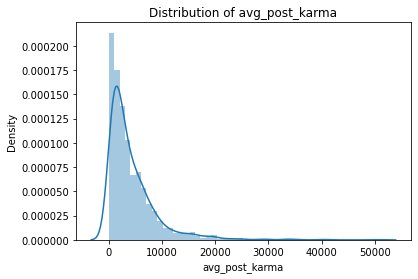

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


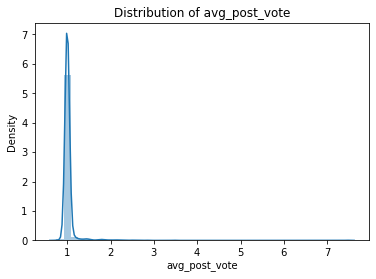

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


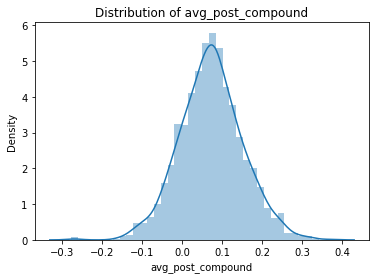

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


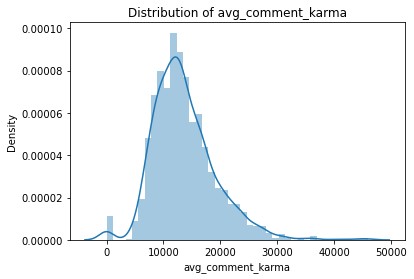

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


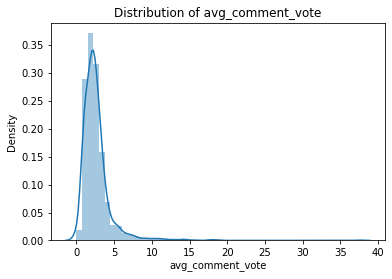

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


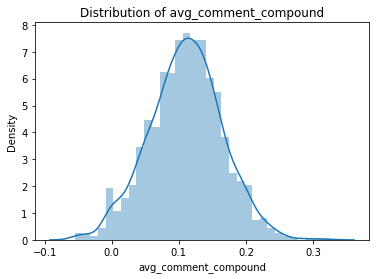

In [16]:
numeric_cols_to_distribute = ['avg_post_karma','avg_post_vote','avg_post_compound','avg_comment_karma','avg_comment_vote','avg_comment_compound']
for col in data[numeric_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.distplot(data[col])
    plt.show()

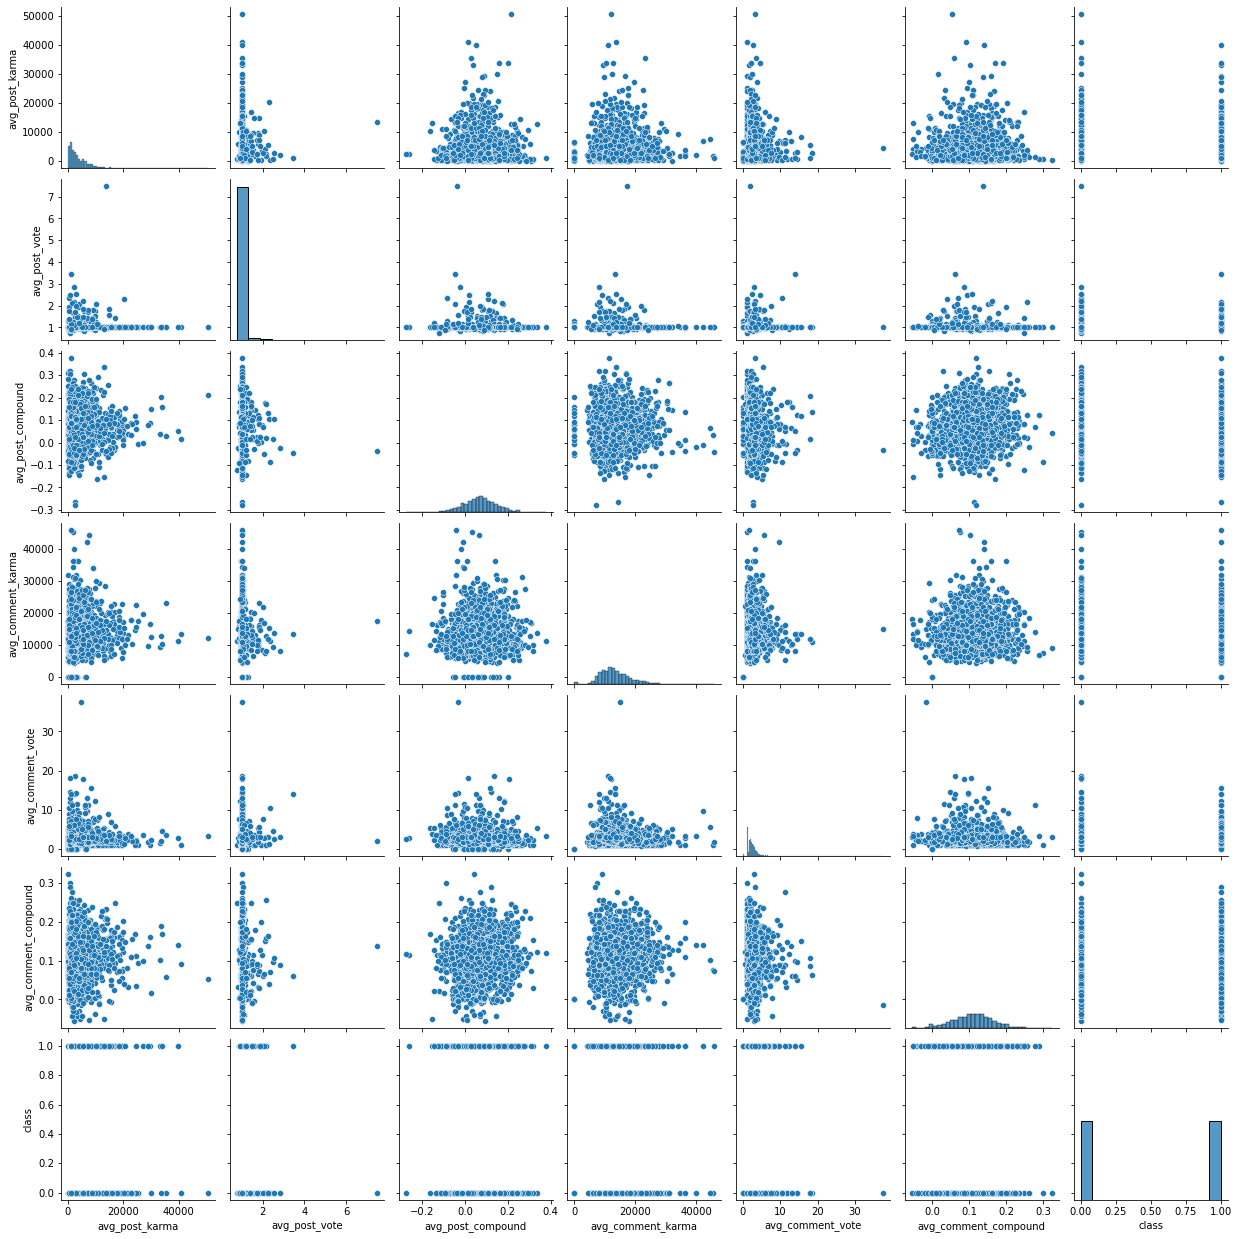

In [17]:
sns.pairplot(data)
plt.show()

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(),mask='matrix')
plt.show()

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [bool]

<Figure size 1080x1080 with 0 Axes>

# Preprocessing Data

In [10]:
train, target = data.loc[:, data.columns != 'class'], data['class'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 12345) #split data 70:30

In [11]:
X_train

avg_post_karma  avg_post_vote  avg_post_compound  avg_comment_karma  \
1140     1900.371429            1.0           0.150311       15261.760417   
768      3285.578947            1.0           0.094404        5512.549451   
1475    12960.000000            1.0           0.226540       12114.554348   
750       896.352941            1.0          -0.007685        6848.280899   
303      1666.388889            1.0           0.077110       14135.515789   
...              ...            ...                ...                ...   
1444     8305.074074            1.0           0.109510       13238.480000   
129      1929.000000            1.0           0.144875       15246.741935   
1309     4621.875000            1.0          -0.104306       11956.689655   
1509     5108.296296            1.0           0.070864        7426.644444   
482      1699.266667            1.0           0.042172        8144.467391   

      avg_comment_vote  avg_comment_compound  
1140              2.11              0.059659  
768               1.54              0.141851  
1475              1.92              0.114639  
750               2.14              0.058410  
303               1.00              0.122384  
...                ...                   ...  
1444              3.85              0.043683  
129               1.00              0.095856  
1309              1.79              0.054078  
1509              3.48              0.148766  
482               3.57              0.149692  

[1130 rows x 6 columns]

In [12]:
y_train

1140    1
768     1
1475    0
750     0
303     0
       ..
1444    0
129     1
1309    1
1509    0
482     1
Name: class, Length: 1130, dtype: int64

# Model Training and Accuracy

In [13]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_order = np.array([train.columns.values])
    i = np.argsort(importances)[::-1]
    feature_order = feature_order[:,i]
    plt.figure()
    plt.title("Relative feature importances")
    plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
    plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
    plt.xlim([-1, train.shape[1]])
    plt.show()

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    

## Decision Tree

F1 score is:  0.6048
Accuracy is:  49.07


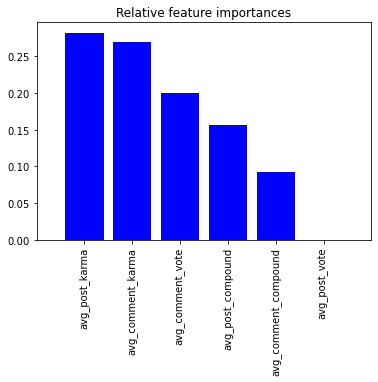

In [15]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_train, y_train)

pred_DT = clf.predict(X_test)
pred_DT_probs = clf.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,pred_DT)))
# clf.score(X_test, y_test)
print ("Accuracy is: ", (accuracy_score(y_test,pred_DT)*100).round(2))

feature_importance(clf)

## Logistic Regression

F1 score is:  0.2112211221122112
Accuracy is:  50.72


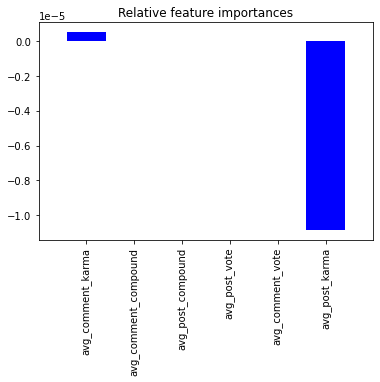

In [16]:
lr_imb = LogisticRegression(solver='lbfgs',max_iter=100000).fit(X_train, y_train)
y_pred_lr_imb = lr_imb.predict(X_test)
y_predProba_lr_imb = lr_imb.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,y_pred_lr_imb)))
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_imb)*100).round(2))

importances = lr_imb.coef_[0]
indices = np.argsort(importances)[::-1]
feature_order = np.array([train.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

## XGBClassifier

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


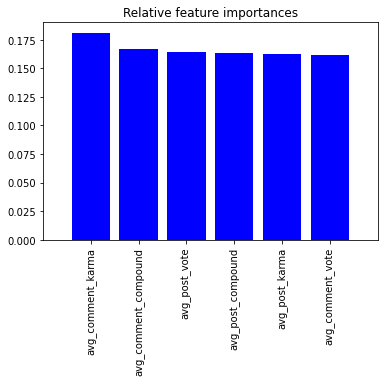

F1 score is:  0.4759916492693111
Accuracy is:  48.25


In [17]:
model = XGBClassifier().fit(X_train, y_train)

pred_XGB = model.predict(X_test)
pred_XGB_prob = model.predict_proba(X_test)
feature_importance(model)

print ("F1 score is: ", (f1_score(y_test,pred_XGB)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_XGB)*100).round(2))
# model.score(X_test, y_test)

## Naive bayes

In [18]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

pred_nb = model_nb.predict(X_test)
pred_NB_prob = model_nb.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_nb)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_nb)*100).round(2))
# model_nb.score(X_test, y_test)

F1 score is:  0.6470588235294119
Accuracy is:  52.99


## SVC

In [19]:
# model_svc = SVC(kernel = "poly", probability=True)
# model_svc.fit(X_train, y_train)

# pred_svc = model_svc.predict(X_test)
# pred_svc_prob = model_svc.predict_proba(X_test)

# print ("F1 score is: ", (f1_score(y_test,pred_svc)))
# print ("Accuracy is: ", (accuracy_score(y_test,pred_svc)*100).round(2))
# # model_svc.score(X_test, y_test)

## Random Forest

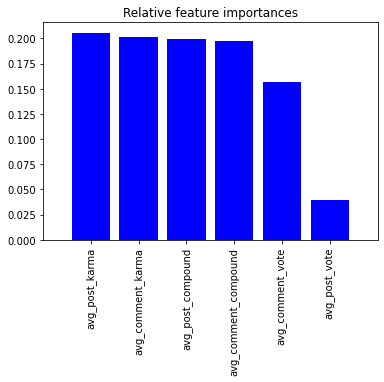

F1 score is:  0.4625267665952891
Accuracy is:  48.25


In [20]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1).fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
pred_RF_prob = model_rf.predict_proba(X_test)
feature_importance(model_rf)

print ("F1 score is: ", (f1_score(y_test,pred_rf)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_rf)*100).round(2))
# model_rf.score(X_test, y_test)

## Ensemble

In [21]:
model_voting = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('gnb', model_nb),
        ('xgb', model),
    ],voting='soft')

pipe = make_pipeline(
    SimpleImputer(),
    model_voting
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred)))
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))
# pipe.score(X_test, y_test)

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score is:  0.4979919678714859
Accuracy is:  48.45


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


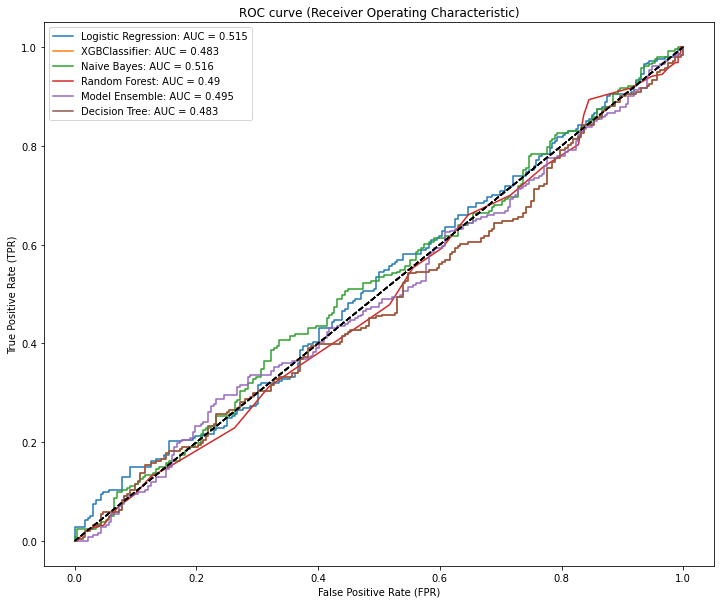

In [22]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test, y_test], [y_predProba_lr_imb[:,1], pred_XGB_prob[:,1], pred_NB_prob[:,1], pred_RF_prob[:,1], y_pred_prob[:,1], pred_XGB_prob[:,1]], ['Logistic Regression','XGBClassifier', 'Naive Bayes', 'Random Forest','Model Ensemble', 'Decision Tree']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

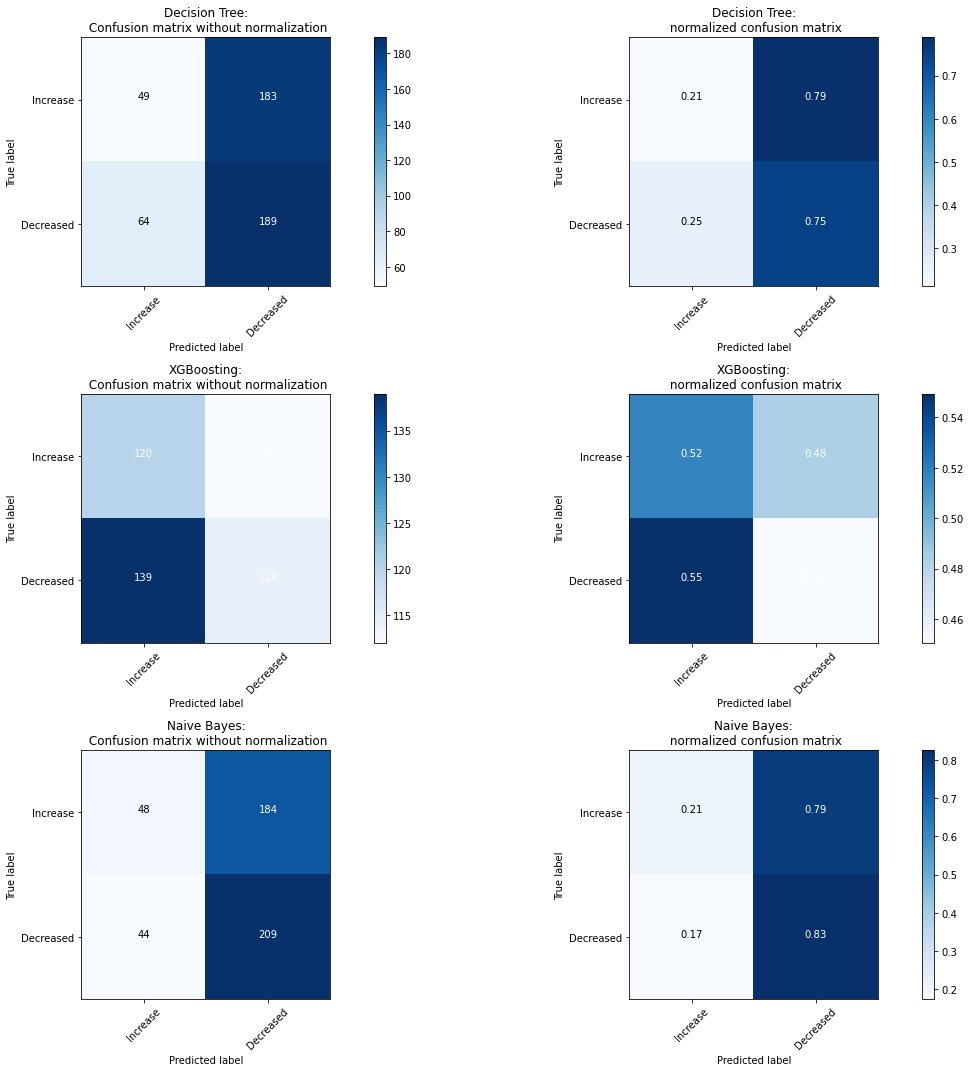

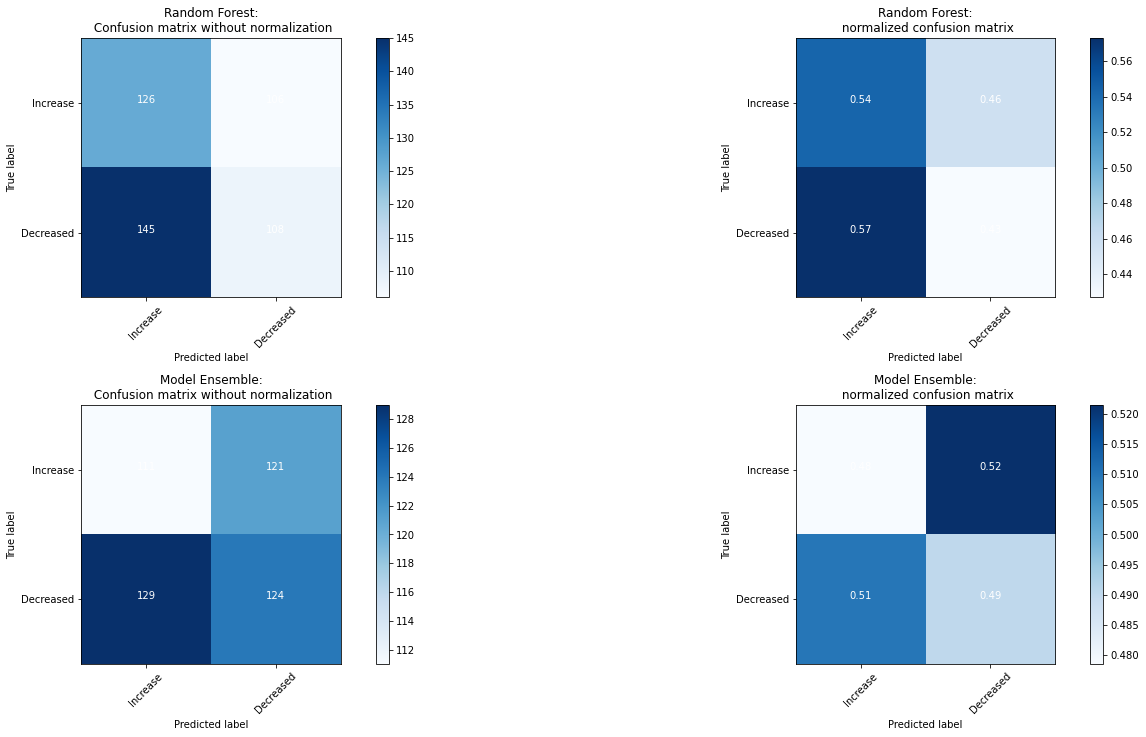

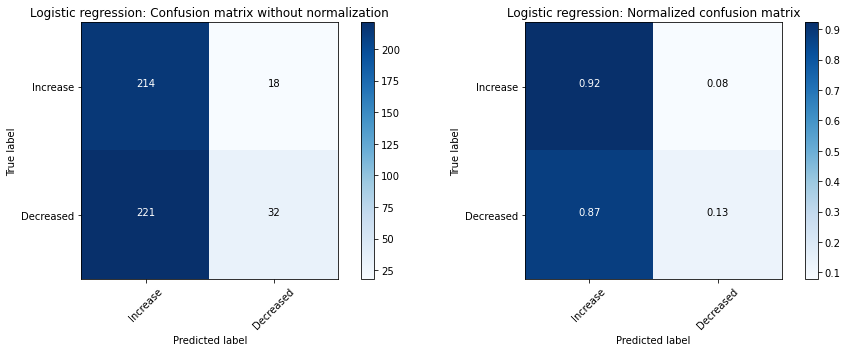

In [23]:
# Compute confusion matrix
class_names = ['Increase', 'Decreased']
cnf_matrix_clf = confusion_matrix(y_test, pred_DT)
cnf_matrix_XGB = confusion_matrix(y_test, pred_XGB) 
cnf_matrix_NB = confusion_matrix(y_test, pred_nb) 
# cnf_matrix_svm = confusion_matrix(y_test, pred_svc)
cnf_matrix_RF = confusion_matrix(y_test, pred_rf)
cnf_matrix_ensemble = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Decision Tree confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names,
                      title='Decision Tree:\n Confusion matrix without normalization')

#Plot Decision Tree normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names, normalize=True,
                      title='Decision Tree:\n normalized confusion matrix')


#Plot XGB confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names,
                      title='XGBoosting:\n Confusion matrix without normalization')

#Plot XGB normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names, normalize=True,
                      title='XGBoosting:\n normalized confusion matrix')

#Plot Naive Bayes confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names,
                      title='Naive Bayes:\n Confusion matrix without normalization')

#Plot Naive Bayes normalized onfusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names, normalize=True,
                      title='Naive Bayes:\n normalized confusion matrix')
plt.show()

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot SVM confusion matrix
# plt.subplot(321) 
# plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
#                       title='SVM:\n Confusion matrix without normalization')

# #Plot SVM normalized confusion matrix
# plt.subplot(322) 
# plot_confusion_matrix(cnf_matrix_svm, classes=class_names, normalize=True,
#                       title='SVM:\n normalized confusion matrix')

#Plot RF confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names,
                      title='Random Forest:\n Confusion matrix without normalization')

#Plot RF normalized confusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names, normalize=True,
                      title='Random Forest:\n normalized confusion matrix')

#Plot Model Ensemble confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names,
                      title='Model Ensemble:\n Confusion matrix without normalization')

#Plot Model Ensemble normalized confusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names, normalize=True,
                      title='Model Ensemble:\n normalized confusion matrix')


plt.show()

cnf_matrix = confusion_matrix(y_test, y_pred_lr_imb)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic regression: Confusion matrix without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Logistic regression: Normalized confusion matrix')


plt.show()

# Rebalancing Data and testing models

In [24]:
# X_train, X_test, y_train, y_test
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
# smote = SMOTE(sampling_strategy='minority',random_state=12345)
smote = SMOTE(sampling_strategy='minority',random_state=12345)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [25]:
def plot_2d_space(X, y, label='Classes', title='x', xlabel='x', ylabel='y'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=2
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

Original label Counter({0: 579, 1: 551})
SMOTE label Counter({1: 579, 0: 579})


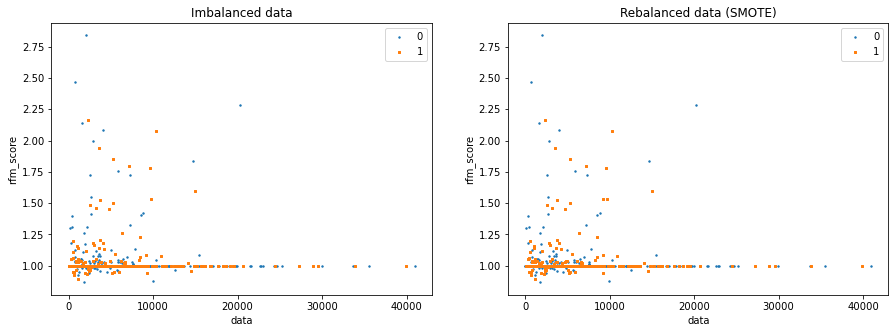

In [26]:
from collections import Counter

print('Original label %s' % Counter(y_train))
print('SMOTE label %s' % Counter(y_sm))

fig = plt.figure(figsize=(15, 5)) #specify figure size

ax0 = plt.subplot(121)
ax0 = plot_2d_space(np.array(X_train), y_train, title='Imbalanced data', xlabel='data', ylabel='rfm_score')

ax1 = plt.subplot(122)
ax1 = plot_2d_space(np.array(X_sm), y_sm, title='Rebalanced data (SMOTE)', xlabel='data', ylabel='rfm_score')

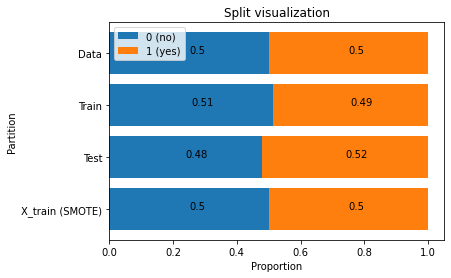

In [27]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = target.value_counts() / len(target)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

# Decision Tree Balanced

F1 score is:  0.6048
Accuracy is:  49.07


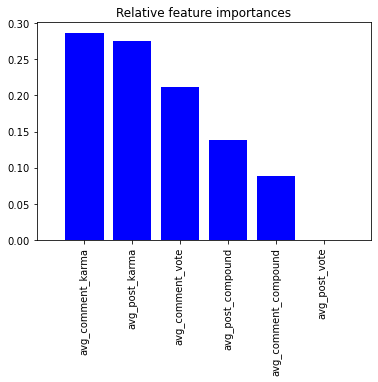

In [28]:
#Define Decision tree classifier with some default parameters
clf_bal = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3).fit(X_sm, y_sm)

pred_DT_bal = clf_bal.predict(X_test)
pred_DT_probs_bal = clf.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,pred_DT_bal)))
# clf.score(X_test, y_test)
print ("Accuracy is: ", (accuracy_score(y_test,pred_DT_bal)*100).round(2))

feature_importance(clf_bal)

# Logistic Regression Balanced

F1 score is:  0.46581196581196577
Accuracy is:  48.45


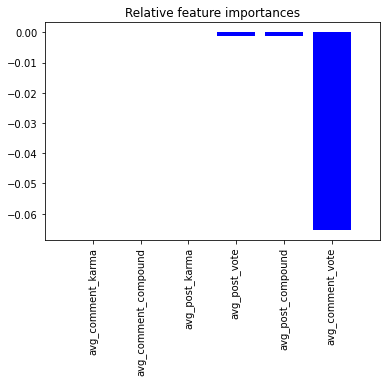

In [29]:
lr_bal = LogisticRegression(solver='lbfgs').fit(X_sm, y_sm)

y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred_lr_bal)))
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

importances = lr_bal.coef_[0]
indices = np.argsort(importances)[::-1]
feature_order = np.array([train.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

# XGBBoost Balanced

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


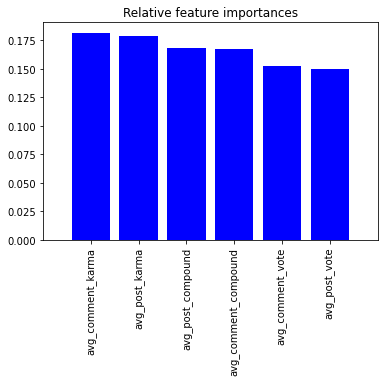

F1 score is:  0.4989775051124744
Accuracy is:  49.48


In [30]:
model_bal = XGBClassifier().fit(X_sm, y_sm)

pred_XGB_bal = model_bal.predict(X_test)
pred_XGB_prob_bal = model_bal.predict_proba(X_test)
feature_importance(model_bal)

print ("F1 score is: ", (f1_score(y_test,pred_XGB_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_XGB_bal)*100).round(2))
# model.score(X_test, y_test)

# Naive bayes balanced

In [31]:
model_nb_bal = GaussianNB().fit(X_sm, y_sm)

pred_nb_bal = model_nb_bal.predict(X_test)
pred_NB_prob_bal = model_nb.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_nb_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_nb_bal)*100).round(2))
# model_nb.score(X_test, y_test)

F1 score is:  0.6481481481481481
Accuracy is:  52.99


# SVC balanced

In [32]:
# model_svc_bal = SVC(kernel = "poly", probability=True).fit(X_sm, y_sm)

# pred_svc_bal = model_svc_bal.predict(X_test)
# pred_svc_prob_bal = model_svc_bal.predict_proba(X_test)

# print ("F1 score is: ", (f1_score(y_test,pred_svc_bal)))
# print ("Accuracy is: ", (accuracy_score(y_test,pred_svc_bal)*100).round(2))
# model_svc.score(X_test, y_test)

# Random Forest Balance

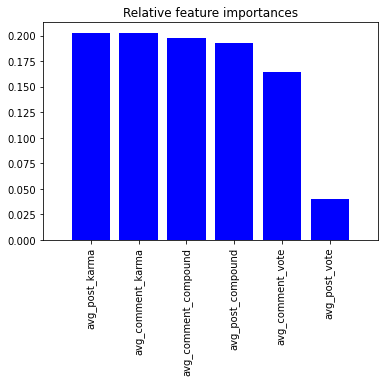

F1 score is:  0.48523206751054854
Accuracy is:  49.69


In [33]:
model_rf_bal = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1).fit(X_sm, y_sm)

pred_rf_bal = model_rf_bal.predict(X_test)
pred_RF_prob_bal = model_rf_bal.predict_proba(X_test)
feature_importance(model_rf_bal)

print ("F1 score is: ", (f1_score(y_test,pred_rf_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_rf_bal)*100).round(2))
# model_rf.score(X_test, y_test)

# Ensemble Balanced

In [34]:
model_voting_bal = VotingClassifier(
    estimators=[
        ('rf', model_rf_bal),
#         ('svc', model_svc_bal),
        ('gnb', model_nb_bal),
        ('xgb', model_bal),
    ],voting='soft')

pipe_bal = make_pipeline(
    SimpleImputer(),
    model_voting
)


pipe_bal.fit(X_sm, y_sm)
y_pred_bal = pipe_bal.predict(X_test)
y_pred_prob_bal = pipe_bal.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,y_pred_bal)*100).round(2))
# pipe.score(X_test, y_test)

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.war

[12:19:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score is:  0.5242718446601943
Accuracy is:  49.48


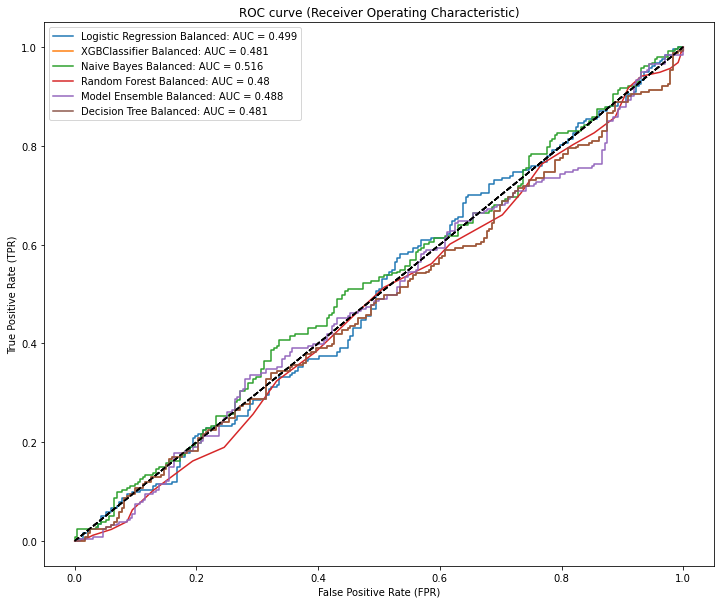

In [35]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test, y_test], [y_predProba_lr_bal[:,1], pred_XGB_prob_bal[:,1], pred_NB_prob_bal[:,1], pred_RF_prob_bal[:,1], y_pred_prob_bal[:,1], pred_XGB_prob_bal[:,1]], ['Logistic Regression Balanced','XGBClassifier Balanced', 'Naive Bayes Balanced', 'Random Forest Balanced','Model Ensemble Balanced', 'Decision Tree Balanced']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()